In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
dataset = pd.read_csv('../preprocessing/preprocessed-training.csv')
dataset

,Arrival Delay (Minutes),Average Temperature(Celcius) /Day,Minimum Temperature(Celcius) /Day,Maximum Temperature(Celcius) /Day,Daily Precipitation(mm) /Day,Maximum Snowfall(mm) /Day,Wind Direction(Degrees) /Day,Wind Speed(km/h) /Day,Atmospheric Pressure(hPa) /Day,Day,Month,Year,Scheduled Arrival Hour,Scheduled Arrival Minute,Status,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,51,14.40,13.30,16.70,16.50,0.00,165.00,7.60,"1,006.70",1,1,2022,23,10,Severely Late,0,1,0
1,-6,-0.90,-4.90,1.10,1.30,100.00,111.00,10.40,"1,010.50",1,1,2023,14,58,On-Time,0,0,0
2,1,11.30,7.20,14.40,0.00,0.00,241.00,13.00,"1,012.60",1,1,2023,23,14,On-Time,1,0,0
3,-10,4.30,2.80,7.20,4.10,0.00,245.00,6.10,"1,013.70",1,1,2023,23,57,On-Time,0,0,1
4,17,14.70,5.60,17.80,1.80,0.00,324.00,13.00,"1,006.60",2,1,2022,23,10,Late,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-1,4.60,3.30,7.80,0.00,0.00,294.00,16.90,"1,004.80",31,12,2019,18,15,On-Time,1,0,0
2083,-6,11.90,10.60,16.10,0.50,0.00,201.00,7.90,"1,012.80",31,12,2021,18,38,On-Time,0,1,0
2084,-12,-0.10,-3.20,9.40,0.00,130.00,189.00,14.00,"1,005.00",31,12,2022,14,58,Early,0,0,0
2085,-24,0.10,-3.20,3.90,0.00,0.00,23.00,4.30,"1,013.40",31,12,2022,21,8,Early,0,0,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['Status','Arrival Delay (Minutes)']), 
                 dataset['Status'], 
                 test_size=0.20, random_state=35)

In [4]:
!pip3 install catboost


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from catboost import CatBoostClassifier
model= CatBoostClassifier(iterations=500,
                                   task_type="CPU",
                                   devices='0:1'
                         )
model.fit(X_train,y_train,verbose=True)

Learning rate set to 0.145894
0:	learn: 1.3398491	total: 138ms	remaining: 1m 9s
1:	learn: 1.3012336	total: 143ms	remaining: 35.5s
2:	learn: 1.2724574	total: 147ms	remaining: 24.3s
3:	learn: 1.2477596	total: 151ms	remaining: 18.7s
4:	learn: 1.2290424	total: 155ms	remaining: 15.3s
5:	learn: 1.2102809	total: 159ms	remaining: 13.1s
6:	learn: 1.1984940	total: 164ms	remaining: 11.6s
7:	learn: 1.1832348	total: 169ms	remaining: 10.4s
8:	learn: 1.1725180	total: 174ms	remaining: 9.5s
9:	learn: 1.1609628	total: 179ms	remaining: 8.78s
10:	learn: 1.1525245	total: 185ms	remaining: 8.21s
11:	learn: 1.1456561	total: 191ms	remaining: 7.78s
12:	learn: 1.1371229	total: 196ms	remaining: 7.33s
13:	learn: 1.1313908	total: 200ms	remaining: 6.94s
14:	learn: 1.1236352	total: 204ms	remaining: 6.6s
15:	learn: 1.1167613	total: 208ms	remaining: 6.31s
16:	learn: 1.1115255	total: 213ms	remaining: 6.05s
17:	learn: 1.1034561	total: 218ms	remaining: 5.83s
18:	learn: 1.0977289	total: 222ms	remaining: 5.63s
19:	learn: 1.

190:	learn: 0.6241310	total: 1.07s	remaining: 1.74s
191:	learn: 0.6233661	total: 1.08s	remaining: 1.73s
192:	learn: 0.6222215	total: 1.08s	remaining: 1.73s
193:	learn: 0.6202881	total: 1.09s	remaining: 1.72s
194:	learn: 0.6187871	total: 1.09s	remaining: 1.71s
195:	learn: 0.6164553	total: 1.1s	remaining: 1.71s
196:	learn: 0.6141717	total: 1.1s	remaining: 1.7s
197:	learn: 0.6114421	total: 1.11s	remaining: 1.69s
198:	learn: 0.6100581	total: 1.11s	remaining: 1.69s
199:	learn: 0.6080636	total: 1.12s	remaining: 1.68s
200:	learn: 0.6060874	total: 1.13s	remaining: 1.67s
201:	learn: 0.6038556	total: 1.13s	remaining: 1.67s
202:	learn: 0.6016821	total: 1.14s	remaining: 1.66s
203:	learn: 0.5995584	total: 1.14s	remaining: 1.65s
204:	learn: 0.5988192	total: 1.15s	remaining: 1.65s
205:	learn: 0.5977686	total: 1.15s	remaining: 1.64s
206:	learn: 0.5962473	total: 1.16s	remaining: 1.64s
207:	learn: 0.5946213	total: 1.16s	remaining: 1.63s
208:	learn: 0.5933223	total: 1.17s	remaining: 1.62s
209:	learn: 0.5

363:	learn: 0.3980007	total: 1.97s	remaining: 735ms
364:	learn: 0.3973421	total: 1.97s	remaining: 730ms
365:	learn: 0.3960286	total: 1.98s	remaining: 724ms
366:	learn: 0.3947571	total: 1.98s	remaining: 719ms
367:	learn: 0.3935801	total: 1.99s	remaining: 713ms
368:	learn: 0.3921435	total: 1.99s	remaining: 708ms
369:	learn: 0.3913870	total: 2s	remaining: 702ms
370:	learn: 0.3899326	total: 2s	remaining: 697ms
371:	learn: 0.3894459	total: 2.01s	remaining: 691ms
372:	learn: 0.3887067	total: 2.01s	remaining: 686ms
373:	learn: 0.3879355	total: 2.02s	remaining: 680ms
374:	learn: 0.3873087	total: 2.02s	remaining: 675ms
375:	learn: 0.3859541	total: 2.03s	remaining: 669ms
376:	learn: 0.3854821	total: 2.03s	remaining: 664ms
377:	learn: 0.3851791	total: 2.04s	remaining: 658ms
378:	learn: 0.3842096	total: 2.04s	remaining: 653ms
379:	learn: 0.3833229	total: 2.05s	remaining: 647ms
380:	learn: 0.3827358	total: 2.05s	remaining: 642ms
381:	learn: 0.3815381	total: 2.06s	remaining: 636ms
382:	learn: 0.3805

In [6]:
predictions = model.predict(X_test)

In [7]:
# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# Combine X_test and the predictions into a single DataFrame
combined_df = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)
combined_df

,Average Temperature(Celcius) /Day,Minimum Temperature(Celcius) /Day,Maximum Temperature(Celcius) /Day,Daily Precipitation(mm) /Day,Maximum Snowfall(mm) /Day,Wind Direction(Degrees) /Day,Wind Speed(km/h) /Day,Atmospheric Pressure(hPa) /Day,Day,Month,Year,Scheduled Arrival Hour,Scheduled Arrival Minute,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD,prediction
0,13.80,7.80,14.40,0.00,0.00,306.00,25.90,"1,013.50",20,3,2022,23,19,0,1,0,On-Time
1,9.70,0.00,19.40,0.00,0.00,324.00,4.70,"1,019.80",21,10,2022,23,31,0,1,0,On-Time
2,9.70,5.00,17.20,0.00,0.00,11.00,18.40,"1,019.00",26,4,2020,20,48,0,0,1,On-Time
3,5.10,2.20,6.10,0.00,0.00,306.00,27.40,"1,012.50",17,10,2022,21,18,0,0,1,On-Time
4,9.50,5.00,13.90,0.00,0.00,11.00,12.20,"1,018.70",26,10,2021,21,2,0,0,1,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,12.60,3.30,21.10,0.00,0.00,37.00,6.50,"1,020.80",22,3,2022,23,19,0,1,0,On-Time
414,27.30,22.80,33.30,0.00,0.00,216.00,21.60,"1,015.90",30,6,2022,16,50,0,0,1,Early
415,28.60,22.20,34.40,0.00,0.00,182.00,9.40,"1,014.60",21,9,2017,20,45,0,0,1,Early
416,2.60,-4.90,5.60,18.50,30.00,347.00,18.40,"1,019.70",3,1,2022,23,10,0,1,0,On-Time


In [8]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
print(classification_report(y_test, predictions, digits=3))

               precision    recall  f1-score   support

        Early      0.500     0.395     0.441       147
         Late      0.000     0.000     0.000        43
      On-Time      0.429     0.655     0.518       165
Severely Late      0.333     0.222     0.267        63

     accuracy                          0.431       418
    macro avg      0.315     0.318     0.306       418
 weighted avg      0.395     0.431     0.400       418



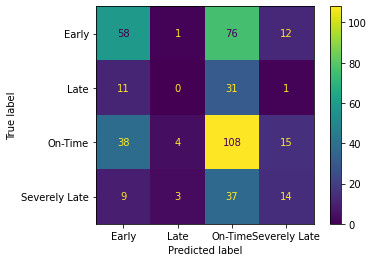

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)

disp.plot()

In [10]:
april_12_14 = pd.read_csv('../preprocessing/preprocessed-12-15-april.csv')

In [11]:
april_12_14  = april_12_14.drop(['Status'], axis = 1)

In [12]:
april_12_14['Status']= np.array(model.predict(april_12_14))

In [13]:
april_12_14.to_csv('initial-predictions.csv', index = False)

In [14]:
april_12_14_actual = pd.read_csv('project csv(Apr 12-15)_actuals.csv')
april_12_14_predicted = pd.read_csv('initial-predictions.csv')

In [15]:
april_12_14_actual = april_12_14_actual.iloc[:-1,:]
april_12_14_predicted = april_12_14_predicted.iloc[:-1,:]

In [16]:
actual_preds = april_12_14_actual['Status ']
predicted_pred = april_12_14_predicted['Status']

In [25]:
actual_preds

0             Early
1           On-Time
2           On-Time
3              Late
4             Early
5           On-Time
6           On-Time
7             Early
8             Early
9             Early
10            Early
11    Severely Late
12    Severely Late
13          On-Time
14          On-Time
15    Severely Late
16            Early
17            Early
18            Early
19            Early
20            Early
21          On-Time
22            Early
23    Severely Late
24            Early
25          On-time
26          On-Time
27            Early
28          On-Time
29            Early
30             Late
Name: Status , dtype: object

In [29]:
actual_preds[actual_preds == 'On-time'] = 'On-Time'

In [30]:
predicted_pred

0     On-Time
1       Early
2     On-Time
3     On-Time
4     On-Time
5     On-Time
6     On-Time
7     On-Time
8     On-Time
9     On-Time
10    On-Time
11    On-Time
12    On-Time
13    On-Time
14    On-Time
15    On-Time
16    On-Time
17    On-Time
18    On-Time
19    On-Time
20    On-Time
21    On-Time
22    On-Time
23    On-Time
24    On-Time
25    On-Time
26    On-Time
27      Early
28    On-Time
29    On-Time
30    On-Time
Name: Status, dtype: object

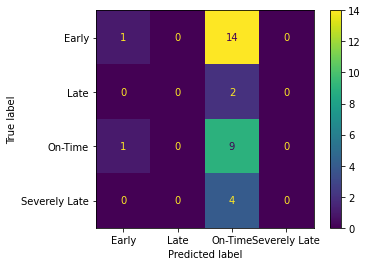

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(actual_preds, predicted_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)

disp.plot()

In [32]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
print(classification_report(actual_preds, predicted_pred, digits=3))

               precision    recall  f1-score   support

        Early      0.500     0.067     0.118        15
         Late      0.000     0.000     0.000         2
      On-Time      0.310     0.900     0.462        10
Severely Late      0.000     0.000     0.000         4

     accuracy                          0.323        31
    macro avg      0.203     0.242     0.145        31
 weighted avg      0.342     0.323     0.206        31



C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
